In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_mnist_data():
    train_data = datasets.QMNIST(root='./dataset/qmnist/', train=True, download=True)
    test_data = datasets.QMNIST(root='./dataset/qmnist/', train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading QMNIST train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading QMNIST test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_mnist_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Loading QMNIST test data: 100%|████████████████████████████| 60000/60000 [00:02<00:00, 20368.37it/s]

Number of training samples: 60000 
Number of test samples: 60000 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Test Class Distribution: [5952 6791 6026 6084 5780 5454 5957 6231 5890 5835]


In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=392
entrySize=784
input_addr_length=2


 Testing: 100%|██████████████████████████████████████████████| 60000/60000 [01:44<00:00, 575.66it/s]


Accuracy:   0.09
Total Training Execution Time: 77.78 seconds


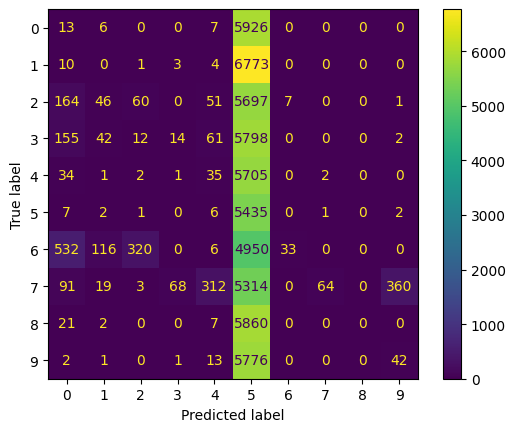

num_of_htables=196
entrySize=784
input_addr_length=4


 Testing: 100%|██████████████████████████████████████████████| 60000/60000 [01:02<00:00, 964.61it/s]


Accuracy:   0.14
Total Training Execution Time: 47.84 seconds


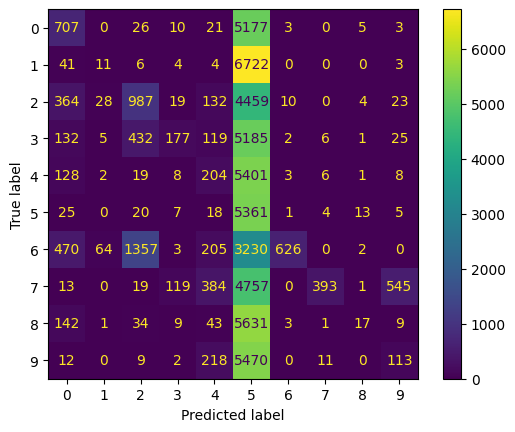

num_of_htables=130
entrySize=784
input_addr_length=6


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:47<00:00, 1259.34it/s]


Accuracy:   0.31
Total Training Execution Time: 38.35 seconds


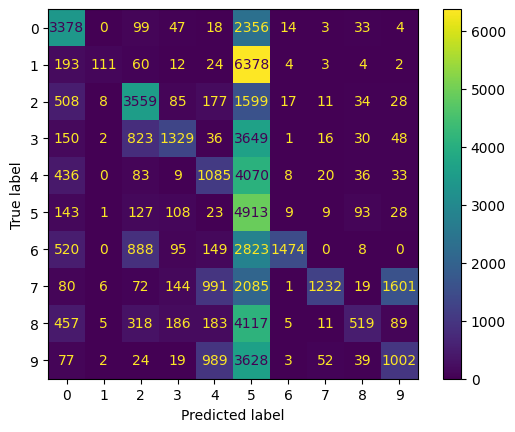

num_of_htables=98
entrySize=784
input_addr_length=8


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:43<00:00, 1372.62it/s]


Accuracy:   0.50
Total Training Execution Time: 34.11 seconds


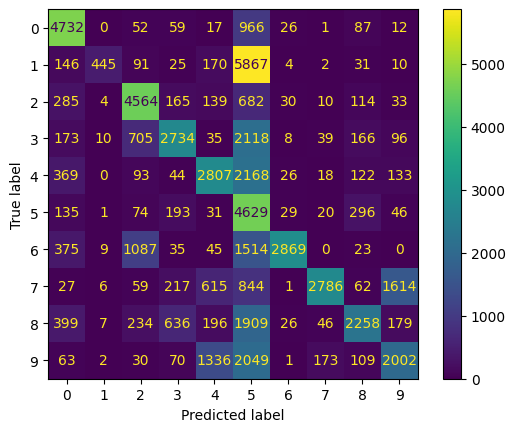

num_of_htables=78
entrySize=784
input_addr_length=10


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:38<00:00, 1540.59it/s]


Accuracy:   0.63
Total Training Execution Time: 32.01 seconds


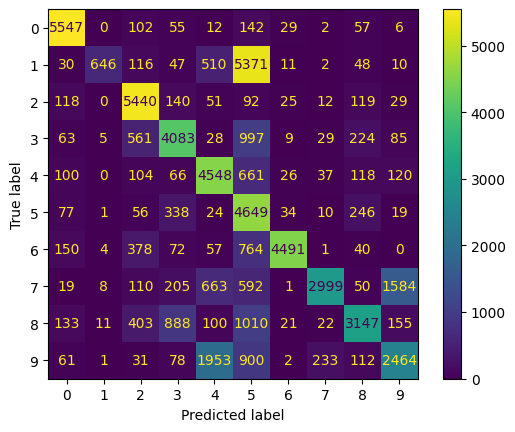

num_of_htables=65
entrySize=784
input_addr_length=12


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:38<00:00, 1565.12it/s]


Accuracy:   0.81
Total Training Execution Time: 30.47 seconds


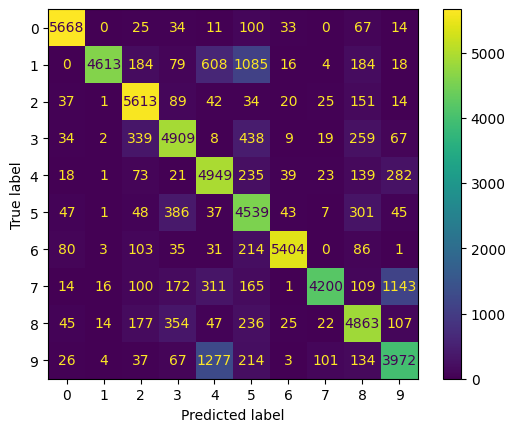

num_of_htables=56
entrySize=784
input_addr_length=14


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:38<00:00, 1539.75it/s]


Accuracy:   0.87
Total Training Execution Time: 29.80 seconds


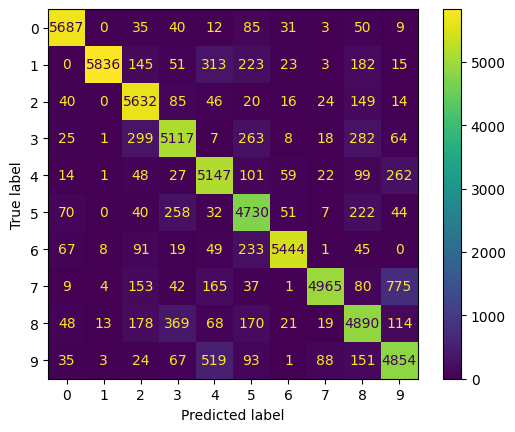

num_of_htables=49
entrySize=784
input_addr_length=16


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:36<00:00, 1628.22it/s]


Accuracy:   0.88
Total Training Execution Time: 29.84 seconds


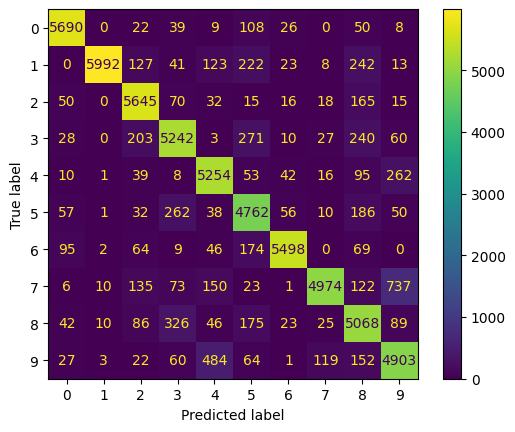

num_of_htables=43
entrySize=784
input_addr_length=18


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:35<00:00, 1674.76it/s]


Accuracy:   0.90
Total Training Execution Time: 29.54 seconds


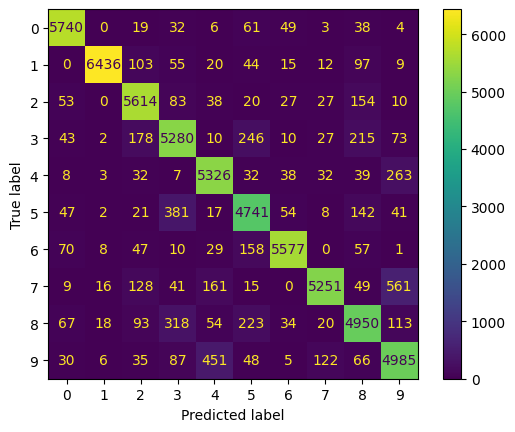

num_of_htables=39
entrySize=784
input_addr_length=20


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:35<00:00, 1713.19it/s]


Accuracy:   0.90
Total Training Execution Time: 29.20 seconds


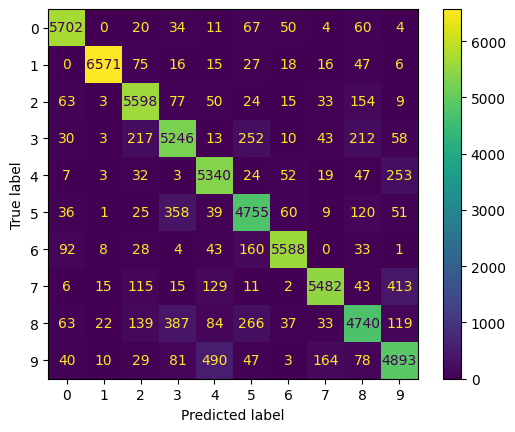

num_of_htables=35
entrySize=784
input_addr_length=22


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:33<00:00, 1777.79it/s]


Accuracy:   0.90
Total Training Execution Time: 28.53 seconds


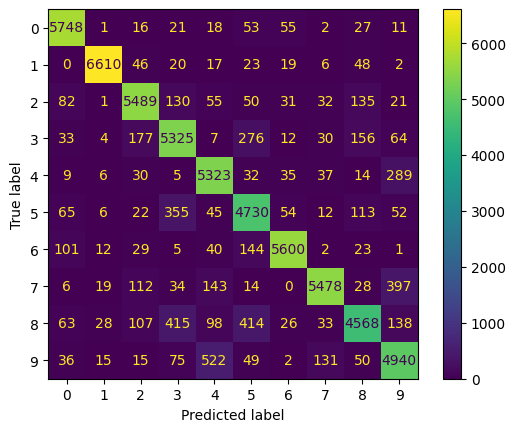

num_of_htables=32
entrySize=784
input_addr_length=24


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:34<00:00, 1733.91it/s]


Accuracy:   0.89
Total Training Execution Time: 28.62 seconds


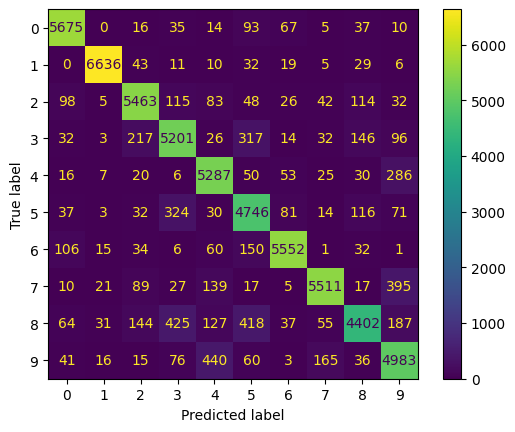

num_of_htables=30
entrySize=784
input_addr_length=26


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:33<00:00, 1807.03it/s]


Accuracy:   0.89
Total Training Execution Time: 28.93 seconds


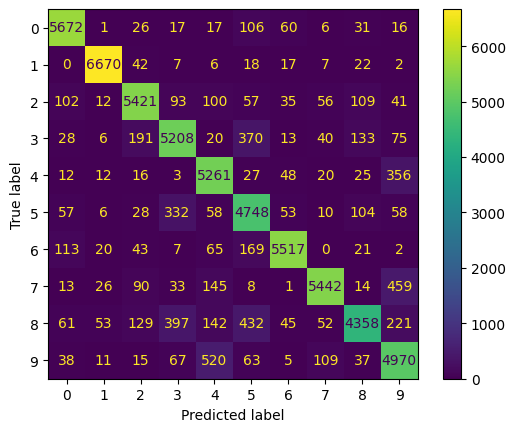

num_of_htables=28
entrySize=784
input_addr_length=28


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:32<00:00, 1831.87it/s]


Accuracy:   0.87
Total Training Execution Time: 28.16 seconds


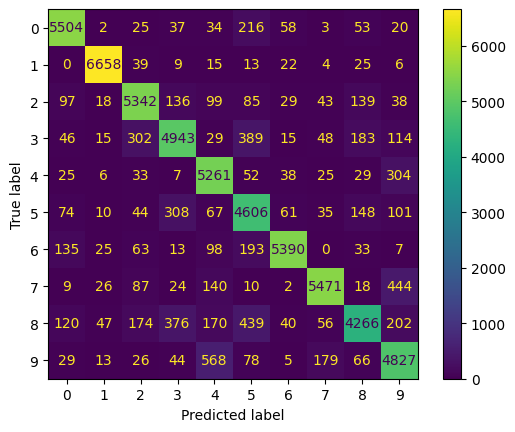

num_of_htables=26
entrySize=784
input_addr_length=30


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:31<00:00, 1877.15it/s]


Accuracy:   0.85
Total Training Execution Time: 28.10 seconds


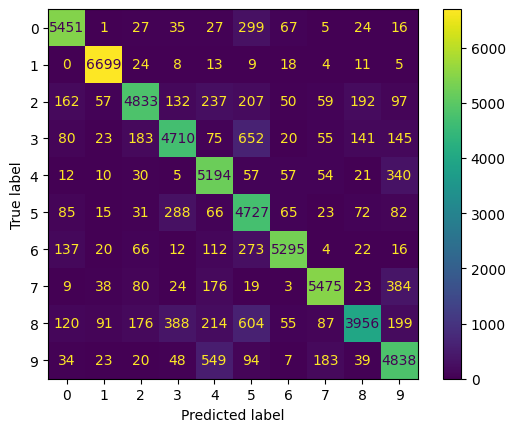

num_of_htables=24
entrySize=784
input_addr_length=32


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:32<00:00, 1829.36it/s]


Accuracy:   0.81
Total Training Execution Time: 28.18 seconds


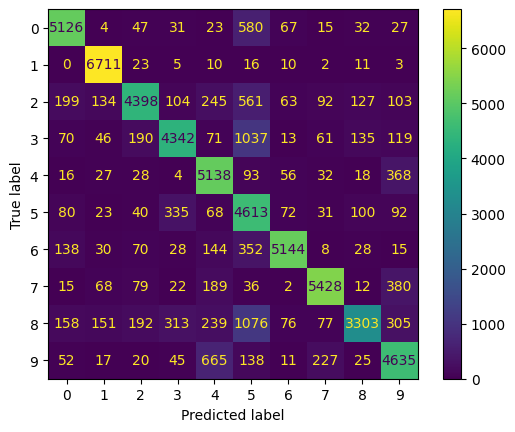

num_of_htables=23
entrySize=784
input_addr_length=34


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:33<00:00, 1795.91it/s]


Accuracy:   0.80
Total Training Execution Time: 28.61 seconds


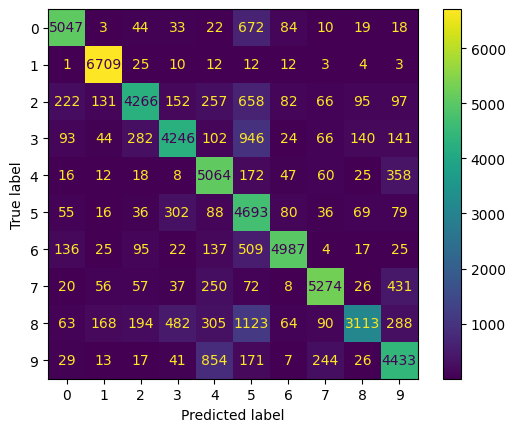

num_of_htables=21
entrySize=784
input_addr_length=36


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:31<00:00, 1923.35it/s]


Accuracy:   0.71
Total Training Execution Time: 28.09 seconds


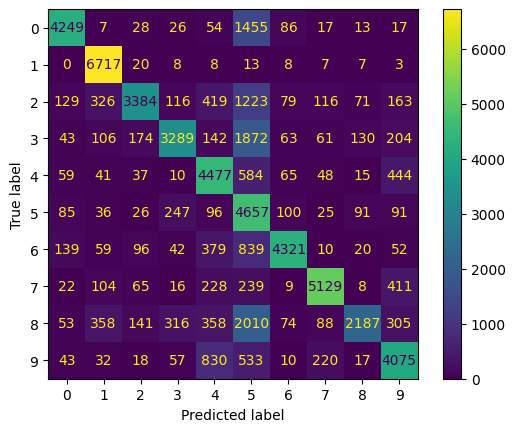

num_of_htables=20
entrySize=784
input_addr_length=38


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:31<00:00, 1918.45it/s]


Accuracy:   0.67
Total Training Execution Time: 27.68 seconds


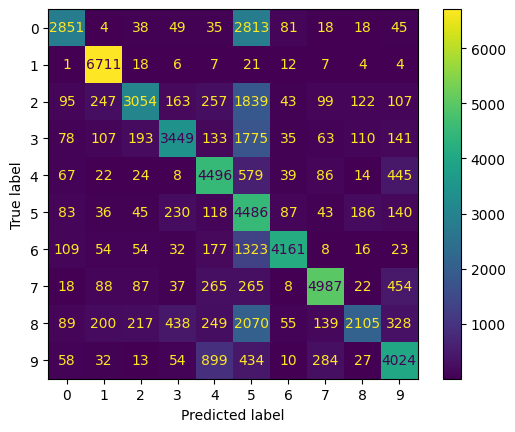

num_of_htables=19
entrySize=784
input_addr_length=40


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:31<00:00, 1916.65it/s]


Accuracy:   0.62
Total Training Execution Time: 27.59 seconds


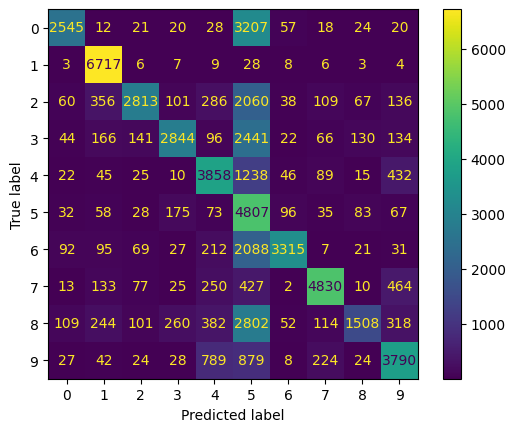

num_of_htables=18
entrySize=784
input_addr_length=42


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:29<00:00, 2000.63it/s]


Accuracy:   0.57
Total Training Execution Time: 27.70 seconds


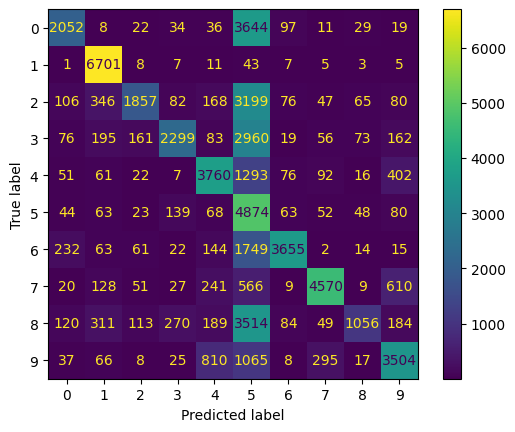

num_of_htables=17
entrySize=784
input_addr_length=44


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:30<00:00, 1972.63it/s]


Accuracy:   0.55
Total Training Execution Time: 27.09 seconds


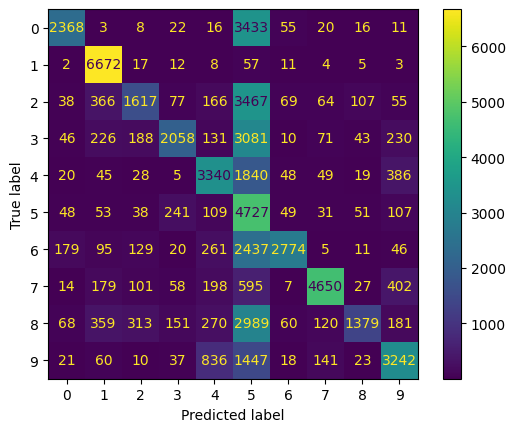

num_of_htables=17
entrySize=784
input_addr_length=46


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:32<00:00, 1872.76it/s]


Accuracy:   0.47
Total Training Execution Time: 28.49 seconds


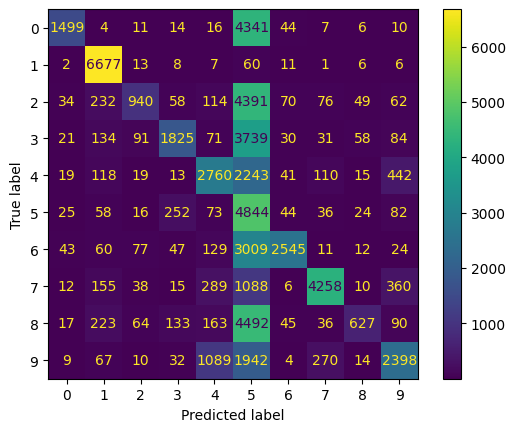

num_of_htables=16
entrySize=784
input_addr_length=48


 Testing: 100%|█████████████████████████████████████████████| 60000/60000 [00:30<00:00, 1959.30it/s]


Accuracy:   0.46
Total Training Execution Time: 27.81 seconds


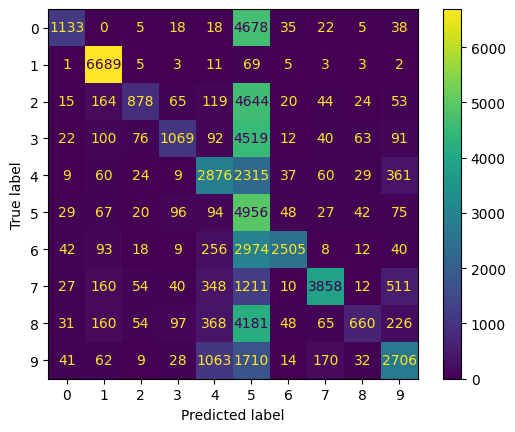

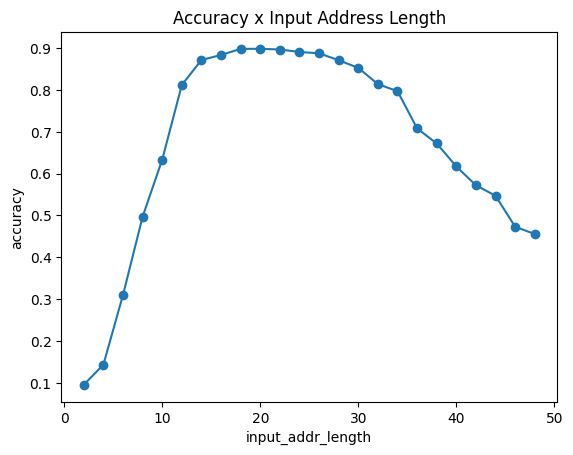

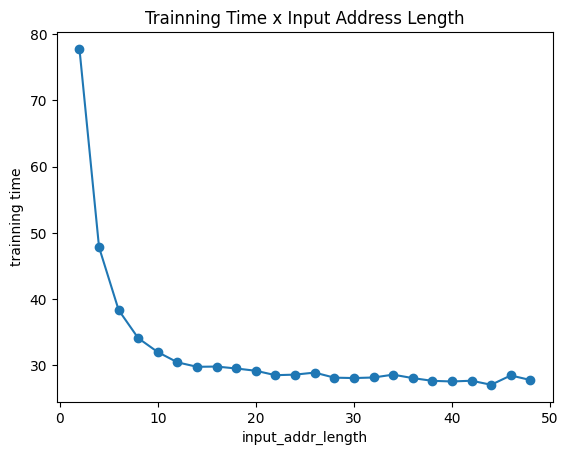

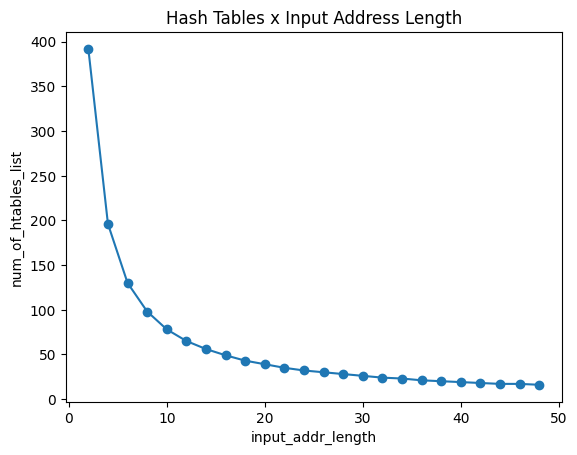

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2             392  0.094933       77.780571
                 4             196  0.143267       47.835072
                 6             130  0.310033       38.354239
                 8              98  0.497100       34.113565
                10              78  0.633567       32.011579
                12              65  0.812167       30.471620
                14              56  0.871700       29.797984
                16              49  0.883800       29.835843
                18              43  0.898333       29.543385
                20              39  0.898583       29.198778
                22              35  0.896850       28.533085
                24              32  0.890933       28.618405
                26              30  0.887783       28.925679
                28              28  0.871133       28.160927
                30              26  0.852967       28.100901
                32      

In [5]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))